<a href="https://colab.research.google.com/github/biilyburcher/Quant_Fin/blob/main/monte_carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Monte Carlo for Portfolio

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
#create a function to return a dataframe for daily adjusted closing prices
def get_adjusted_prices(ticker,start_date,end_date):
  price=pd.DataFrame()
  ticker_list=list()
  for i in ticker:
    price=pd.concat([price,pd.DataFrame(yf.download(i,start=start_date,end=end_date).iloc[:,4])],axis=0)
    ticker_list.append(i)
  price.columns=ticker_list
  price['Date']=price.index
  return price


In [ ]:
tickers=["SPY"]
start='2024-01-01'
end='2024-10-12'
df=get_adjusted_prices(tickers,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(df.head())

                   SPY       Date
Date                             
2024-01-02  472.160004 2024-01-02
2024-01-03  470.429993 2024-01-03
2024-01-04  468.299988 2024-01-04
2024-01-05  467.489990 2024-01-05
2024-01-08  468.429993 2024-01-08


In [ ]:
print(df.tail())

                   SPY       Date
Date                             
2024-10-07  571.299988 2024-10-07
2024-10-08  570.419983 2024-10-08
2024-10-09  573.159973 2024-10-09
2024-10-10  575.770020 2024-10-10
2024-10-11  576.049988 2024-10-11


In [ ]:
df.drop(index=df.index[-1],axis=0,inplace=True)

In [ ]:
#drop last column
df.drop(df.columns[-1],axis=1,inplace=True)

In [ ]:
df.head()

,SPY
Date,
2024-01-02,472.160004
2024-01-03,470.429993
2024-01-04,468.299988
2024-01-05,467.489990
2024-01-08,468.429993


In [ ]:
# Transformation to compute daily percent change for each stock
df_percent_change=pd.DataFrame()
for i in df.columns:
  df_percent_change[i]=(df[i].shift(-1)-df[i])/df[i]
  df_percent_change.dropna(inplace=True)

In [ ]:
df_percent_change.tail()

,SPY
Date,
2024-10-03,0.008795
2024-10-04,-0.001835
2024-10-07,-0.001540
2024-10-08,0.004803
2024-10-09,0.004554


In [ ]:
cv_matrix=df_percent_change.cov()

In [ ]:
# monte carlo simulations

number_of_simulations=1000
scenario_returns=[]
for _ in range(number_of_simulations):
  z_score=np.random.normal(0,1,len(df_percent_change.columns))
  scenario_return =np.sum(z_score*np.sqrt(np.diag(cv_matrix)))*np.sqrt(250)
  scenario_returns.append(scenario_return)

In [ ]:
# VaR calculation

confidence_level=0.95
VaR=np.percentile(scenario_returns,100*(1-confidence_level))

In [ ]:
print(f" VaR at 95% confidence level is :{VaR*100:.2f} percent")

 VaR at 95% confidence level is :-20.76 percent


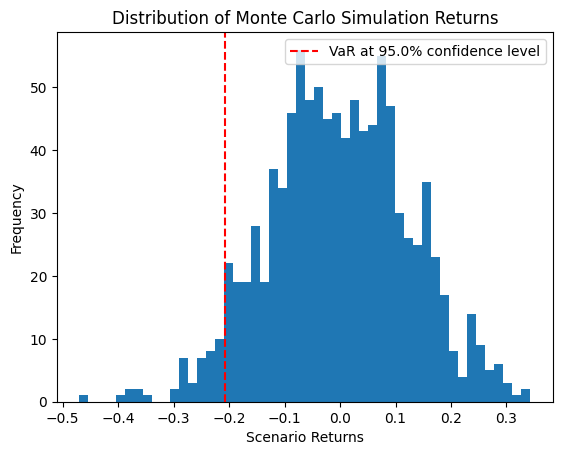

In [ ]:
plt.hist(scenario_returns,bins=50)
plt.xlabel("Scenario Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Monte Carlo Simulation Returns")
plt.axvline(x=VaR,color='r',linestyle='--',label=f"VaR at {confidence_level*100}% confidence level")
plt.legend()
plt.show()